 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [2]:
Path.cwd()

WindowsPath('C:/Users/torre/Desktop/Portfolio_Performance_Analysis')

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# whale_returns.describe()
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [6]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [8]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_history.sort_index(inplace = True)
sp500_history

C:\Users\torre\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [13]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {"Close":"S&P500"}, inplace = True)
sp500_daily_returns.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolios_df = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis='columns', join='inner')
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

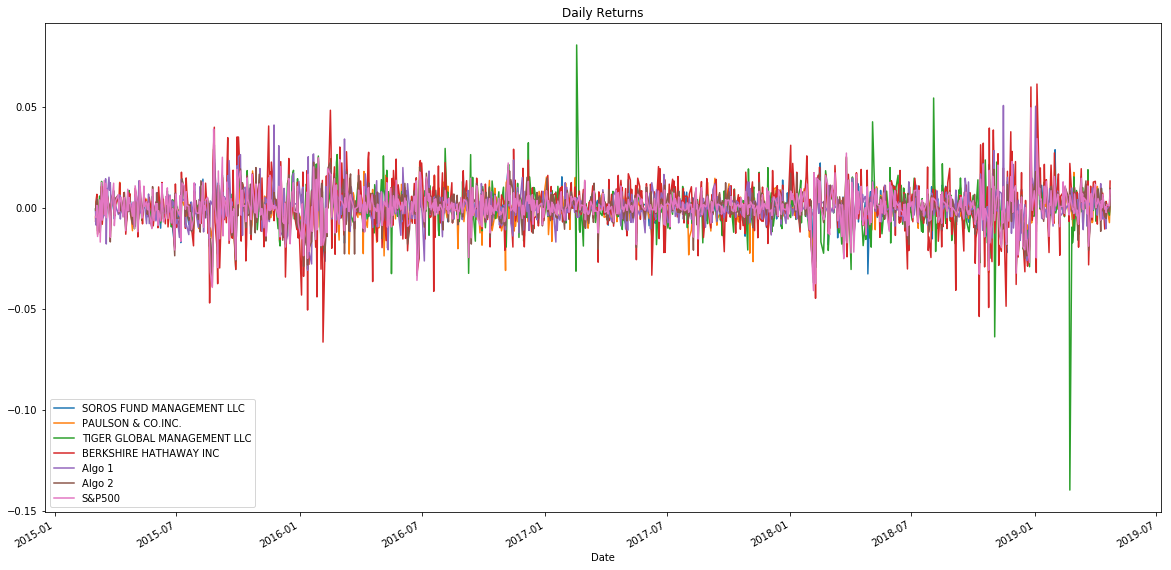

In [19]:
# Plot daily returns of all portfolios
combined_portfolios_df.plot( title="Daily Returns" , figsize=(20,10))

#### Calculate and Plot cumulative returns.

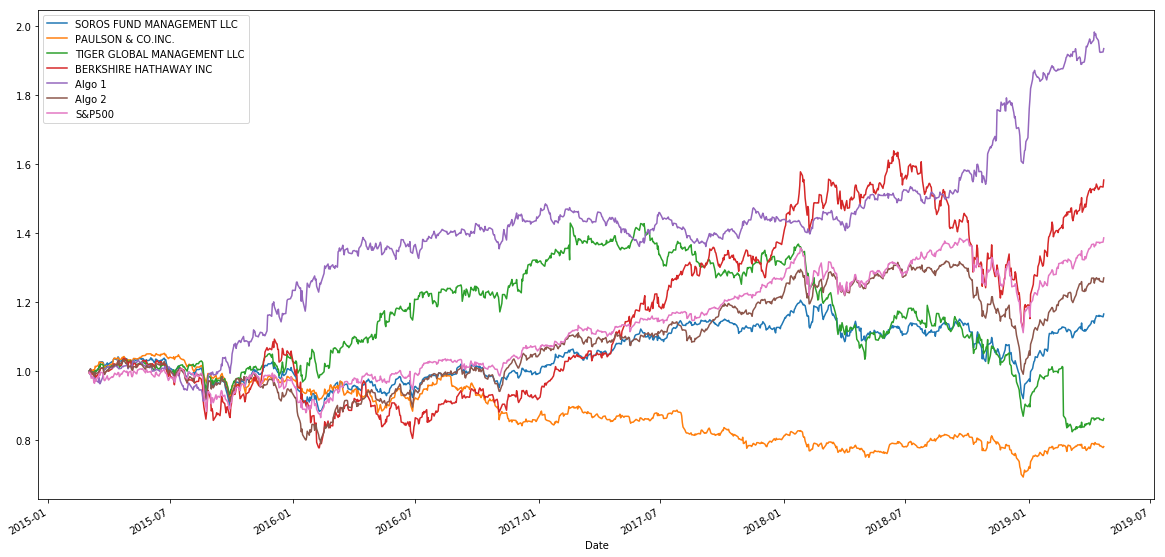

In [20]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
combined_portfolios_df_cumulative_returns = (1 + combined_portfolios_df).cumprod()
combined_portfolios_df_cumulative_returns.head()
combined_portfolios_df_cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


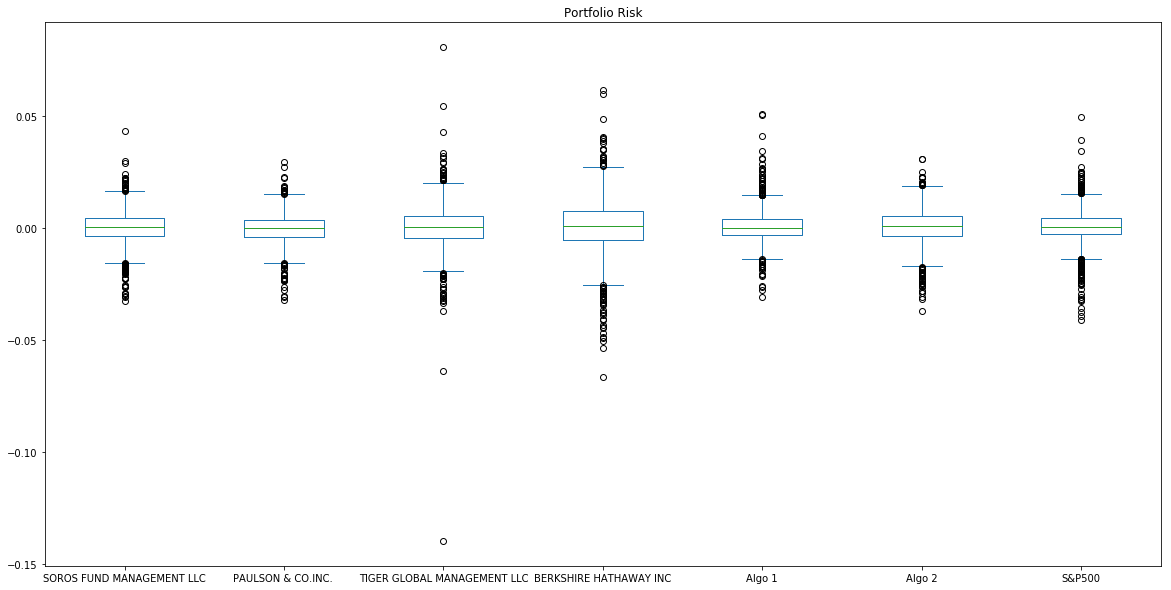

In [21]:
# Box plot to visually show risk
combined_portfolios_df.plot.box(title= "Portfolio Risk", figsize=(20,10))

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_portfolios_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P500                         0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [25]:
# Calculate  the daily standard deviation of S&P 500
daily_std = combined_portfolios_df.std().sort_values(ascending=False)
daily_std
# Determine which portfolios are riskier than the S&P 500


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P500                         0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [36]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window 
# Plot the rolling standard deviation
sp500_rolling_21 = daily.std[["sp500"]].rolling(window = 21).std()
sp500_rolling_21.plot(figsize = (20,10))



NameError: name 'daily' is not defined

### Calculate and plot the correlation

In [38]:
# Calculate the correlation
correlation_sp500 = pd.DataFrame(sp500_rolling_21.corr()).loc[:,"sp500"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]
# Display de correlation matrix
sp500_rolling_21.plot(kind="scatter", y = "Algo 2", x = "sp500", figsize = (20,10))

NameError: name 'sp500_rolling_21' is not defined

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [33]:
# Calculate covariance of a single portfolio
rolling_covariance = df_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily['sp500'])
rolling_variance = df_daily['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')

NameError: name 'df_daily' is not defined

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [34]:
# Use `ewm` to calculate the rolling window
df_daily_ewm = df_daily.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10))

NameError: name 'df_daily' is not defined

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [40]:
# Reading data from 1st stock
aapl_history = pd.read_csv(Path("Resources/aaple.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
aapl_history.rename(columns = {"Close":"aapl"}, inplace = True)
aapl_history.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Resources\\aaple.csv'

In [ ]:
# Reading data from 2nd stock
amzn_history = pd.read_csv(Path("Resources/Amazon_StockPrice.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
amzn_history.rename(columns = {"Close":"amzn"}, inplace = True)
amzn_history.head()

In [ ]:
# Reading data from 3rd stock
goog_history = pd.read_csv(Path("Resources/Google_StockPrice.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
goog_history.rename(columns = {"Close":"goog"}, inplace = True)
goog_history.head()

In [ ]:
# Combine all stocks in a single DataFrame
my_stocks = pd.concat((aapl_history, amzn_history, goog_history), axis = 1, join= "inner")
my_stocks.sort_index(ascending = True, inplace = True)
my_stocks.head()

In [ ]:
# Reset Date index
my_stocks.index = my_stocks.index.normalize()

In [ ]:
# Reorganize portfolio data by having a column per symbol
my_stocks.columns = ['AAPL', 'AMZN', 'GOOG']

In [ ]:
# Drop NAs
# Calculate daily returns
# Display sample data
my_stocks.dropna(inplace=True)
my_stocks = my_stocks.pct_change()
my_stocks.head()



## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
# Calculate portfolio return
weights = [1/3, 1/3, 1/3]
my_portfolio = my_stocks.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

# Display sample data
my_stocks.index = my_stocks.index.normalize().head()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios_2 = pd.concat([whale_returns,algo_returns, sp500_returns, my_portfolio_returns], axis='columns', join='inner')
combined_portfolios_2.head()

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios_2 = combined_portfolios_2.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`
combined_portfolios_2_annualized_std = combined_portfolios_2_daily_std *np.sqrt(252)
combined_portfolios_2_annualized_std.sort_values(ascending=False)

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
combined_portfolios_2.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))



### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
combined_portfolios_2_correlation = combined_portfolios_2.corr()
combined_portfolios_2_correlation
combined_portfolios_2.plot(title="Correlation", figsize=(20,10))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta
# Beta
custom_covariance = combined_portfolios_2_df['Custom'].rolling(window=60).cov(combined_portfolios_2_df['S&P500'])
custom_covariance
# Calculate variance of all daily returns vs. S&P 500
variance_2 = combined_portfolios_2_df['S&P500'].rolling(window=60).var()
variance_2
# Calculate beta of all daily returns 
custom_beta = custom_covariance / variance_2
custom_beta_plot = custom_beta.plot(title="60 Day Portfolio Beta", figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
combined_portfolios_2_df_sharpe_ratios = (combined_portfolios_2_df.mean() * 252) / (combined_portfolios_2_df.std() * np.sqrt(252))
combined_portfolios_2_df_sharpe_ratios.sort_values(ascending=False)

In [ ]:
# Visualize the sharpe ratios as a bar plot
combined_portfolios_2_df_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!